In [6]:
# General
! pip install biosppy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import biosppy
from biosppy.signals import ecg

# ML

from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


     |████████████████████████████████| 76 kB 4.1 MB/s eta 0:00:011


## Data Preprocessing

### Data Input

In [2]:
X, y = data_fetching.get_train_data()
#x_test = data_fetching.get_test_data()

### Plot some data

[[<AxesSubplot:title={'center':'y'}>]]


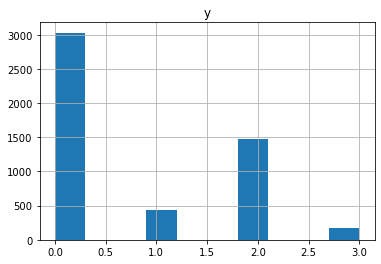

In [3]:
print(y.hist())

## Class 0 examples:

row:
4772
label:
y    0
Name: 4772, dtype: int64


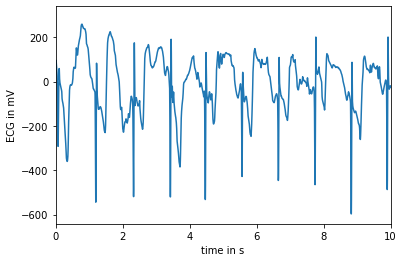

In [94]:
# 300hz frequency
class_0 = np.where(y == 0)[0]
i = np.random.choice(class_0)
print('row:')
print(i)
# to be sure:
print('label:')
print(y.iloc[i])
fs = 300
time = np.arange(X.iloc[i].size) / fs
plt.plot(time, X.iloc[i])
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(0, 10)
#plt.ylim(-1, 1.5)
plt.show()


## Class 1 Examples:

row:
2386
label:
y    1
Name: 2386, dtype: int64


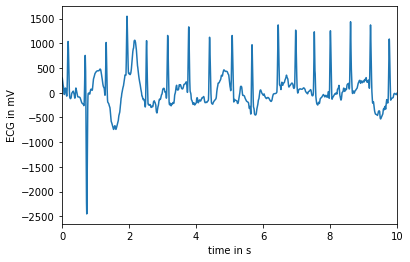

In [88]:
# 300hz frequency
class_1 = np.where(y == 1)[0]
i = np.random.choice(class_1)
print('row:')
print(i)
# to be sure:
print('label:')
print(y.iloc[i])
fs = 300
time = np.arange(X.iloc[i].size) / fs
plt.plot(time, X.iloc[i])
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(0, 10)
#plt.ylim(-1, 1.5)
plt.show()

## Class 2 Examples:

row:
971
label:
y    2
Name: 971, dtype: int64


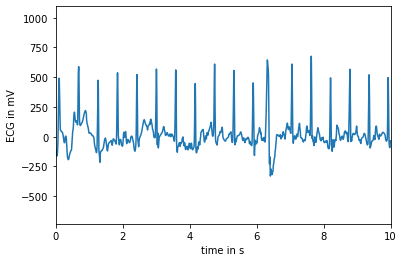

In [81]:
# 300hz frequency
class_2 = np.where(y == 2)[0]
i = np.random.choice(class_2)
print('row:')
print(i)
# to be sure:
print('label:')
print(y.iloc[i])
fs = 300
time = np.arange(X.iloc[i].size) / fs
plt.plot(time, X.iloc[i])
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(0, 10)
#plt.ylim(-1, 1.5)
plt.show()

## Class 3 Examples:

row:
3289
label:
y    3
Name: 3289, dtype: int64


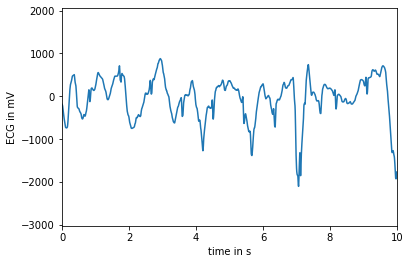

In [73]:
# 300hz frequency
class_3 = np.where(y == 3)[0]
i = np.random.choice(class_3)
print('row:')
print(i)
# to be sure:
print('label:')
print(y.iloc[i])
fs = 300
time = np.arange(X.iloc[i].size) / fs
plt.plot(time, X.iloc[i])
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(0, 10)
#plt.ylim(-1, 1.5)
plt.show()

In [4]:
classnr = widgets.IntSlider(min=0,max=3)
low_slider = widgets.IntSlider(min=0)
interval_slider = widgets.IntSlider(min=5)
random_ticker = widgets.ToggleButton()

def plot_example(class_nr, sec_low, interval, random=False):
    class_x = np.where(y == class_nr)[0]
    if random:
        i = np.random.choice(class_x)
    else:
        i = class_x[0]
    print('row:')
    print(i)
    # to be sure:
    print('label:')
    print(y.iloc[i])
    fs = 300
    time = np.arange(X.iloc[i].size) / fs
    plt.plot(time, X.iloc[i])
    plt.xlabel("time in s")
    plt.ylabel("ECG in mV")
    plt.xlim(sec_low, sec_low + interval)
    #plt.ylim(-1, 1.5)
    plt.show()
    
interact(plot_example, class_nr=classnr, sec_low=low_slider, interval=interval_slider, random=random_ticker)

interactive(children=(IntSlider(value=0, description='class_nr', max=3), IntSlider(value=0, description='sec_l…

<function __main__.plot_example(class_nr, sec_low, interval, random=False)>

In [66]:
classnr = widgets.IntSlider(min=0,max=3)
index_slider = widgets.IntSlider(min=0,max=100)
import pyhrv.hrv
import neurokit as nk

def plot_biosppy(class_nr, index):
    class_x = np.where(y == class_nr)[0]
    i = class_x[index]
    print('row:')
    print(index)
    print('label:')
    print(y.iloc[i])
    fs = 300
    
    signal_nan = np.asarray(X.iloc[i])
    # get rid of nans for this: 
    signal = signal_nan[np.logical_not(pd.isnull(signal_nan))]
    t = signal.size / fs
    #results = pyhrv.hrv(signal=signal, sampling_rate=fs)
    out = ecg.ecg(signal=signal, sampling_rate=fs, show=True)
    
    ecg_preprocessed = nk.ecg_preprocess(signal, sampling_rate=fs)
    #print(ecg_preprocessed)
    print(ecg_preprocessed)
    #plt.ylim(-1, 1.5)
    return
    
interact(plot_biosppy, class_nr=classnr, index=index_slider)

interactive(children=(IntSlider(value=0, description='class_nr', max=3), IntSlider(value=0, description='index…

<function __main__.plot_biosppy(class_nr, index)>

In [50]:
! pip install pyhrv neurokit

     |████████████████████████████████| 720 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 6.8 MB 80.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=dc34874b645b0946d9452f3c478086b8605411898f9897e0680bea440bbe8077
  Stored in directory: /home/jupyter/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=ab5327d95ac6b9daf15fce81b460eafba10cabd0322cfeb255b08fbdcf7da4bd
  Stored in directory: /home/jupyter/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built sklearn docopt


NameError: name 'signal' is not defined